In [32]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

Load the dataset.

In [4]:
d=loadmat("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex5data1.mat")

This dataset is divided into three parts:
* A training set that your model will learn on: X, y
* A cross validation set for determining the regularization parameter: Xval, yval
* A test set for evaluating performance. These are “unseen” examples our model did not see during training: Xtest, ytest

In [5]:
d.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [6]:
x, y, xval, yval, xtest, ytest=d['X'], d['y'], d['Xval'], d['yval'], d['Xtest'], d['ytest']

In [7]:
x= np.c_[np.ones((d['X'].shape[0],1)), d['X']]
xval=np.c_[np.ones((d['Xval'].shape[0],1)), d['Xval']]

In [8]:
x.shape, xval.shape, xtest.shape

((12, 1), (21, 1), (21, 1))

Let's visualize the dataset.

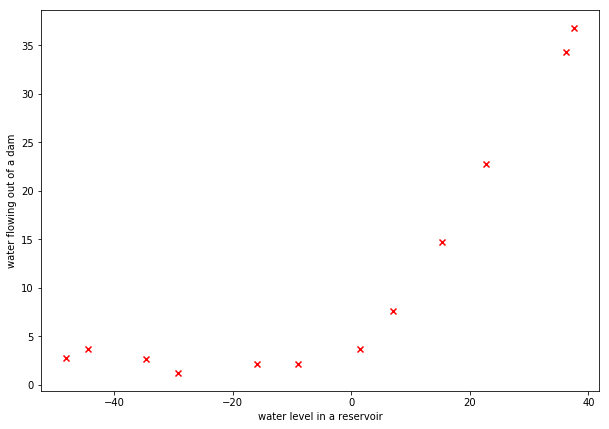

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x[:,1], y, marker='x', color='r')
plt.xlabel("water level in a reservoir")
plt.ylabel("water flowing out of a dam")
plt.show()

Regularized linear regression cost function.

In [9]:
def linearRegCostFunction(theta,X,y,reg):
   
    m=y.size
    
    h = X.dot(theta)
    
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
   
    return(J)

In [11]:
theta= np.ones((x.shape[1], 1)) # 1 for column size

In [12]:
linearRegCostFunction(theta,x,y,0 )

303.9515255535976

Regularized linear regression gradient

In [66]:
def lrgradientReg(theta,X,y,reg):
    
    m=y.size
    
    h = X.dot(theta.reshape(-1,1))
        
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [14]:
grad=lrgradientReg(theta,x,y,0)
grad

array([-15.30301567, 598.16741084])

Fitting linear regression

In [113]:
def trainLinearReg(X, y, reg):
    
    initial_theta = np.ones((X.shape[1],1))*15
        
    res = minimize(linearRegCostFunction, initial_theta, args=(X,y,reg), method=None, jac=lrgradientReg,options={'maxiter':5000})
    
    return(res)

In [86]:
fit = trainLinearReg(x, y, 0)
fit

      fun: 1604.4002999186634
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([ 3.42437190e-12, -5.70370264e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])

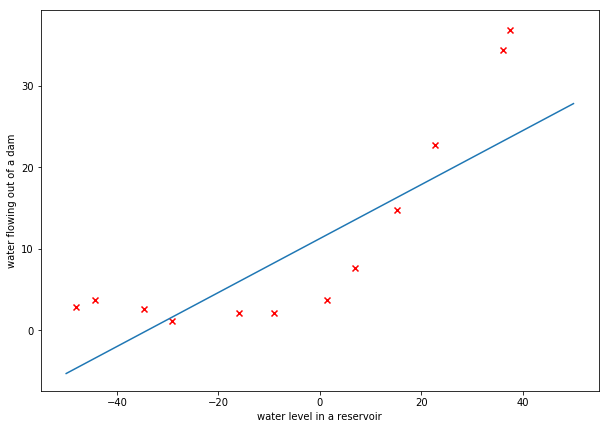

In [17]:
plt.figure(figsize=(10,7))
plt.plot(np.linspace(-50,50),(fit.x[0] + (np.linspace(-50,40)*fit.x[1])))
plt.scatter(x[:,1], y, marker='x', color='r')
plt.xlabel("water level in a reservoir")
plt.ylabel("water flowing out of a dam")
plt.show()

Let's generate the learning curves

In [70]:
def learningCurve(X, y, Xval, yval, reg):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in np.arange(m):
        res = trainLinearReg(X[:i+1], y[:i+1], reg)
        error_train[i] = linearRegCostFunction(res.x, X[:i+1], y[:i+1], reg)
        error_val[i] = linearRegCostFunction(res.x, Xval, yval, reg)
    
    return(error_train, error_val)

In [77]:
train_error, val_error = learningCurve(x, y, xval, yval, 0)

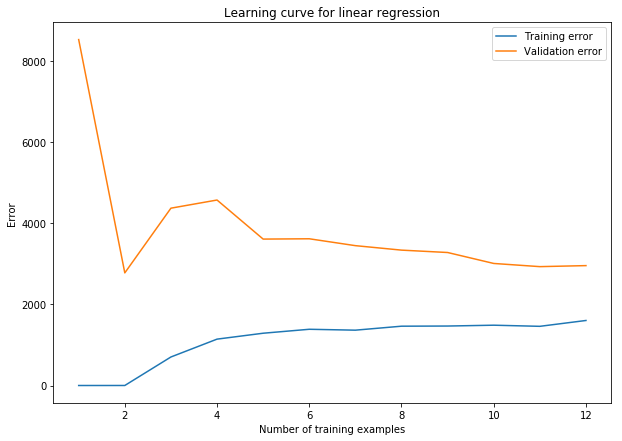

In [78]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,13), train_error, label='Training error')
plt.plot(np.arange(1,13), val_error, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

This reflects a high bias problem in the model – the linear regression model is too simple and is unable to fit our dataset well.

#### Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). We can address this problem by adding more features.

In [36]:
polynomial= PolynomialFeatures(8)

In [102]:
xpoly= polynomial.fit_transform(x[:,1].reshape(-1,1))
xvalp=polynomial.fit_transform(xval[:,1].reshape(-1,1))

In [58]:
xpoly.shape, xvalp.shape

((12, 9), (21, 9))

In [112]:
LR = LinearRegression()
LR.fit(xpoly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

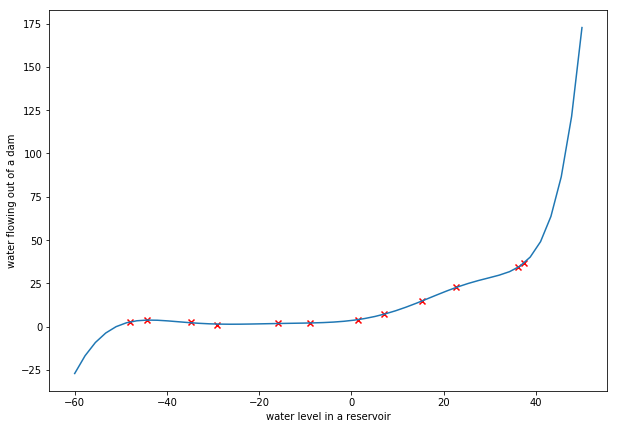

In [100]:
plt.figure(figsize=(10,7))
xplot=np.linspace(-60,50)
yplot=LR.intercept_ + np.sum(LR.coef_*polynomial.fit_transform((np.linspace(-60,50)).reshape(-1,1)), axis=1)
plt.plot(xplot,yplot)
plt.scatter(x[:,1], y, marker='x', color='r')
plt.xlabel("water level in a reservoir")
plt.ylabel("water flowing out of a dam")
plt.show()

As we can see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error.
However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

In [81]:
train_error_poly, val_error_poly = learningCurve(xpoly, y, xvalp, yval, 0)

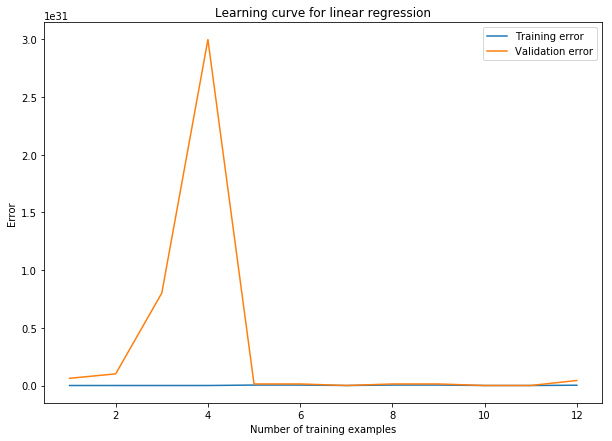

In [82]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,13), train_error_poly, label='Training error')
plt.plot(np.arange(1,13), val_error_poly, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

This figure shows the same effect where the low training error is low, but the cross validation error is high. There
is a gap between the training and cross validation errors, indicating a high variance problem.